In [1]:
import os
os.chdir('../')

import torch
from src.planters import wishart

import matplotlib.pyplot as plt

In [2]:
device = torch.device('cpu')

In [3]:
n = 100
m = 50
batch_size = 10


s = wishart.generate_solutions(n, batch_size, device=device)
J = wishart.generate_problems(s, m, device=device)

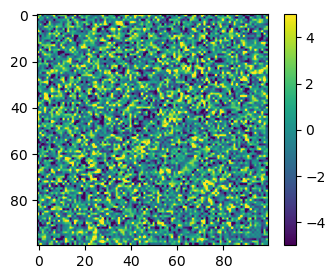

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
im = ax.imshow(J[0].cpu(), vmin=-5, vmax=+5)
plt.colorbar(im, ax=ax)
plt.show()

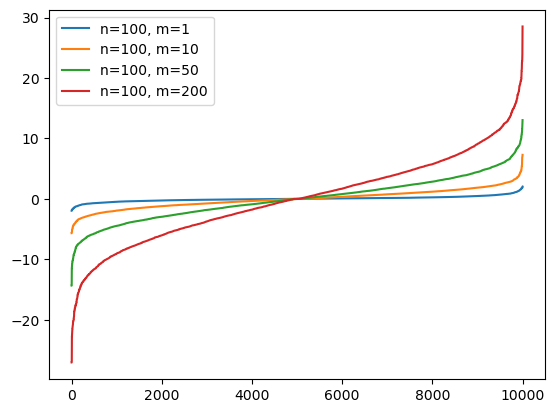

In [10]:
s = wishart.generate_solutions(100, 1, device=device)
ms = [1, 10, 50, 200]
Js = [wishart.generate_problems(s, m, device=device)[0].cpu() for m in ms]

for i in range(1, 5):
    plt.plot(Js[i-1].flatten().sort()[0], label='n=100, m={}'.format(ms[i-1]))

plt.legend()
plt.show()